In [1]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


Bad key text.latex.preview in file /opt/anaconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably

In [2]:
# define the path
m3_data_path = './Baseline_Project_M3DDPG/experiments/learning_curves'
md_data_path = './Baseline_Project_MADDPG/experiments/learning_curves'
ma_data_path = './Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves'

alg_dict = {'md':'MADDPG with adversary', 'm3':'M3DDPG with adversary', 'ma': 'RMAAC', 'mdnt': 'MADDPG with noise', 'm3nt': 'M3DDPG with noise'}
limit_exp_const = 3

In [3]:
# obtain the experiment settings from filename
def exp_attr(fname):
    attrs = {}
    name, suffix = fname.split('.')
    attrs['name'] = name
    attrs['algorithm'], attrs['scenario'], attrs['exp'], attrs['re'] = name.split('_')
    #print(attrs)
    return attrs

# given the experiments results directory, return selected 
# experiment filenames;
# algorithms = [list of algo to be queried]
# scenario = "string of scenario"
def query(path, algorithm, scenario=None, limit_exp = limit_exp_const, reward = 'rewards'):
    fileList = os.listdir(path)
    results = [f for f in fileList if f[-4:]=='.pkl']
    s_flag = (scenario is not None)
    if (not s_flag):
        raise ValueError("Cannot query algorithms")
    if s_flag:
        temp_results = []
        for f in results:
            if len(f.split('.')[0].split('_')) != 4:
                continue
            algo, sc, exp, re = f.split('.')[0].split('_')
            if sc != scenario:
                continue
            if algo != algorithm:
                continue
            if exp[0] != 'e':
                continue
            if int(exp[1:]) > limit_exp:
                continue
            if re != reward:
                continue
            temp_results.append(f)
        results = temp_results
    results = [os.path.join(path, res) for res in results]
    return results

def add_entries(files, scenario, return_time=False):
    columns=['Algorithm','Episode(k)','Reward']
    df = None
    for fname in files:
        print(fname)
        f_attr = exp_attr(os.path.basename(fname))
        if f_attr['scenario']!=scenario:
            continue
        alg = f_attr['algorithm']
        #print(alg, attempt, uv)
        data = pickle.load(open(fname, 'rb'))
        for i in range(len(data)):
            results = [[alg_dict[alg], i+1, data[i]]]
            temp_df = pd.DataFrame(results, columns=columns)
            if df is None:
                df = temp_df
            else:
                df = df.append(temp_df,ignore_index=True)
    #print(df)
    return df

def read_reward_for_one_algorithm_one_scenario(path, algo, scenario):
    files = query(path, algo, scenario)
    #print(files)
    return add_entries(files, scenario)

def read_reward_for_one_scenario(scenario):
    ma_data = read_reward_for_one_algorithm_one_scenario(ma_data_path, 'ma', scenario)
    m3_data = read_reward_for_one_algorithm_one_scenario(m3_data_path, 'md', scenario)
    md_data = read_reward_for_one_algorithm_one_scenario(md_data_path, 'md', scenario)
    res = ma_data
    res = res.append(m3_data, ignore_index=True)
    #res = res.append(md_data, ignore_index=True)
    return res

def plt_cooperative_scenario(scenario):
    res = read_reward_for_one_scenario(scenario)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=res, \
                     x='Episode(k)', y='Reward', \
                     hue='Algorithm',ci = 100, lw=3)
    plt.xlabel('episode(k)',fontsize=font_size)# x轴标签
    plt.ylabel('mean episode reward', fontsize=font_size)# y轴标签
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s1_e02_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s1_e01_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s1_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s1_e02_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s1_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s1_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s1_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s1_e01_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s1_e03_rewards.pkl


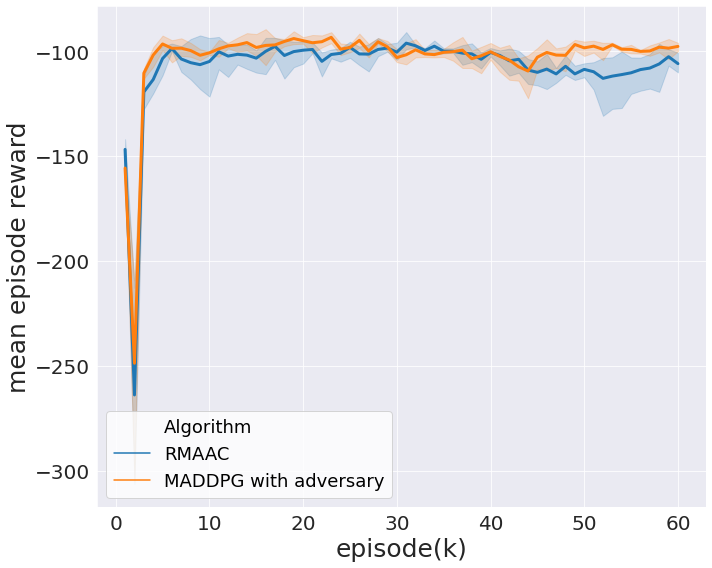

In [11]:
plt_cooperative_scenario('s1')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s3_e01_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s3_e02_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s3_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s3_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s3_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s3_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s3_e01_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s3_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s3_e02_rewards.pkl


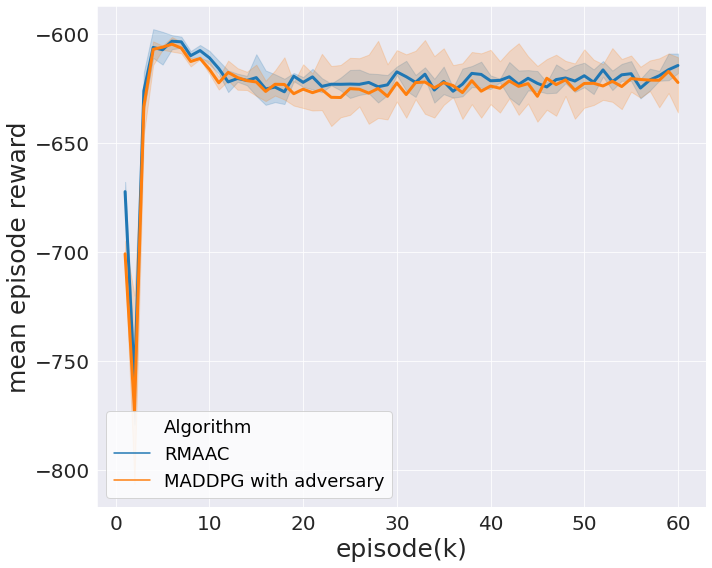

In [12]:
plt_cooperative_scenario('s3')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s4_e03_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s4_e02_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s4_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s4_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s4_e02_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s4_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s4_e01_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s4_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s4_e03_rewards.pkl


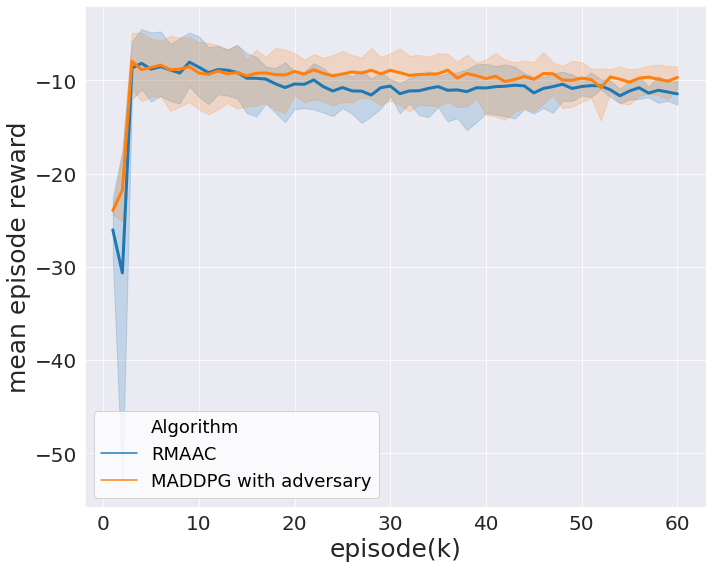

In [13]:
plt_cooperative_scenario('s4')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s7_e03_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s7_e01_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s7_e02_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s7_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s7_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/md_s7_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s7_e01_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s7_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/md_s7_e02_rewards.pkl


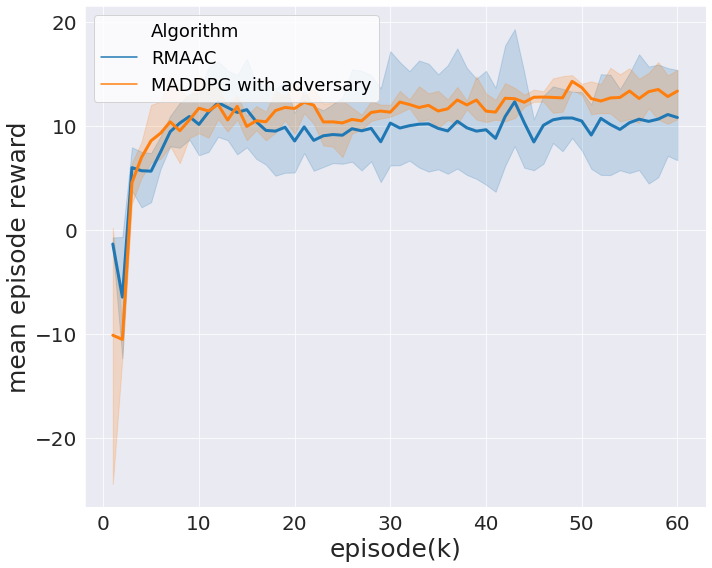

In [14]:
plt_cooperative_scenario('s7')

## Compare RMMAC with MADDPG/M3DDPG with noise

In [4]:
def read_reward_for_one_scenario(scenario):
    ma_data = read_reward_for_one_algorithm_one_scenario(ma_data_path, 'ma', scenario)
    m3_data = read_reward_for_one_algorithm_one_scenario(m3_data_path, 'm3nt', scenario)
    md_data = read_reward_for_one_algorithm_one_scenario(md_data_path, 'mdnt', scenario)
    res = ma_data
    res = res.append(m3_data, ignore_index=True)
    res = res.append(md_data, ignore_index=True)
    return res

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s1_e02_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s1_e01_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s1_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s1_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s1_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s1_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s1_e01_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s1_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s1_e02_rewards.pkl


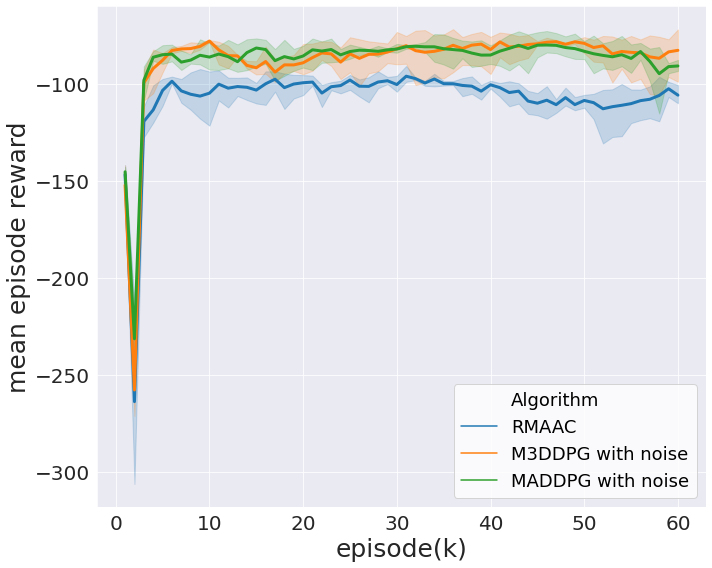

In [5]:
plt_cooperative_scenario('s1')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s2_e02_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s2_e01_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s2_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s2_e02_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s2_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s2_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s2_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s2_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s2_e01_rewards.pkl


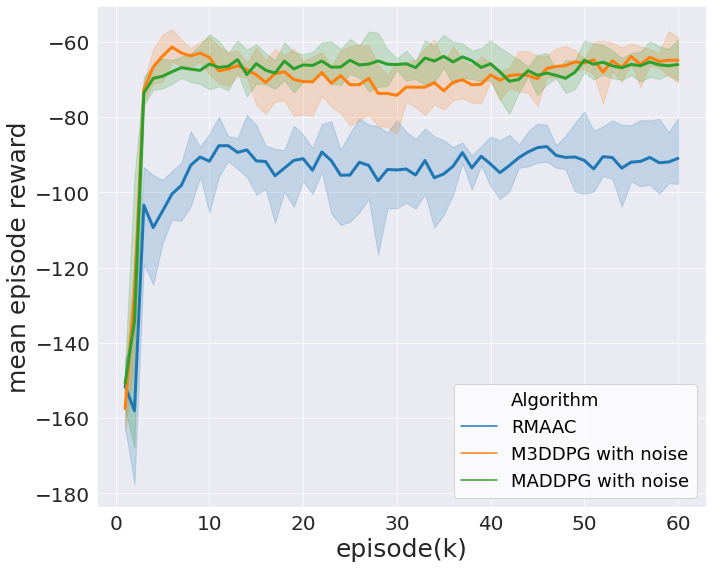

In [6]:
plt_cooperative_scenario('s2')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s3_e01_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s3_e02_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s3_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s3_e02_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s3_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s3_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s3_e01_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s3_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s3_e03_rewards.pkl


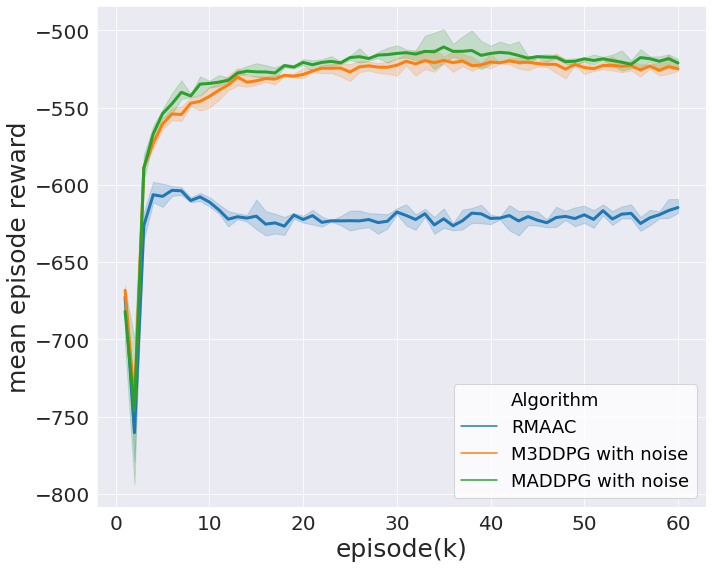

In [7]:
plt_cooperative_scenario('s3')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s4_e03_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s4_e02_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s4_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s4_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s4_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s4_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s4_e01_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s4_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s4_e03_rewards.pkl


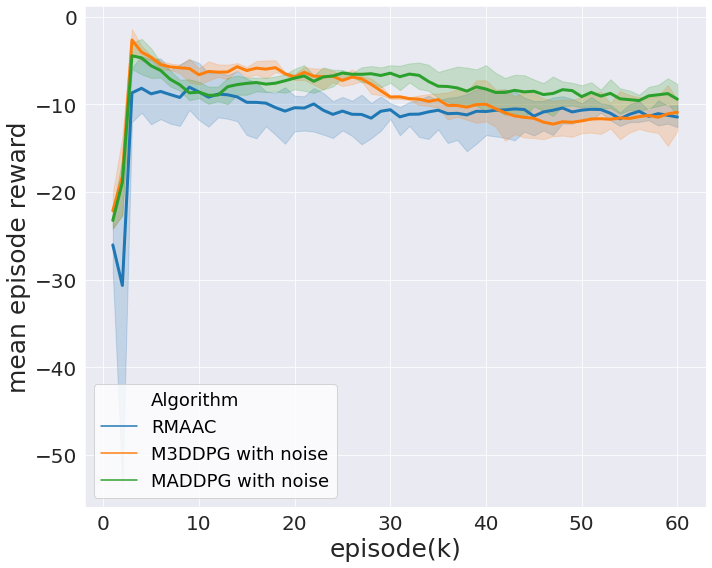

In [8]:
plt_cooperative_scenario('s4')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s5_e02_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s5_e03_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s5_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s5_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s5_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s5_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s5_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s5_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s5_e01_rewards.pkl


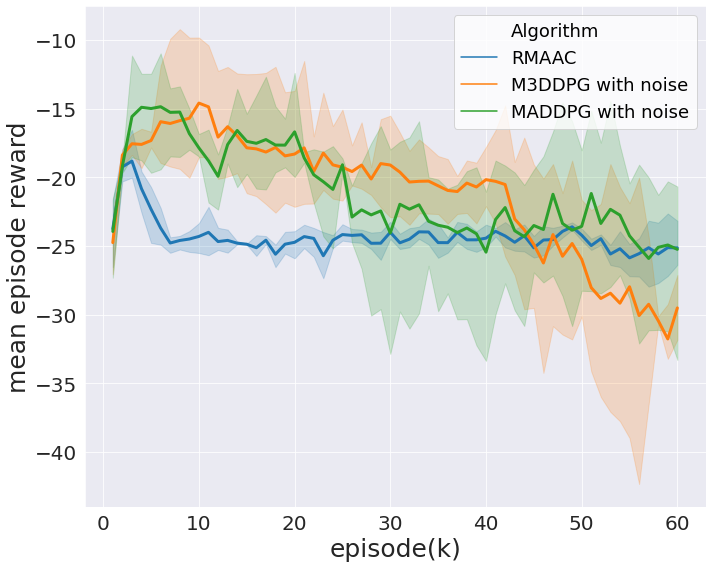

In [9]:
plt_cooperative_scenario('s5')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s6_e02_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s6_e03_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s6_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s6_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s6_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s6_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s6_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s6_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s6_e01_rewards.pkl


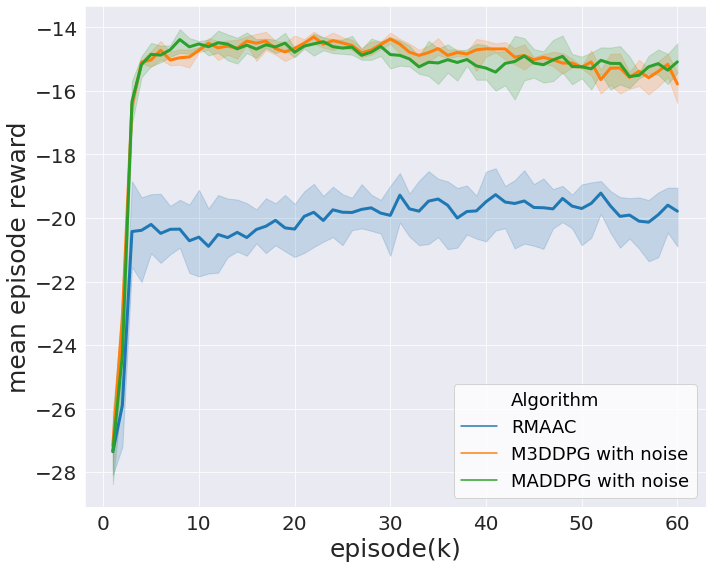

In [10]:
plt_cooperative_scenario('s6')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s7_e03_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s7_e01_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s7_e02_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s7_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s7_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s7_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s7_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s7_e01_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s7_e02_rewards.pkl


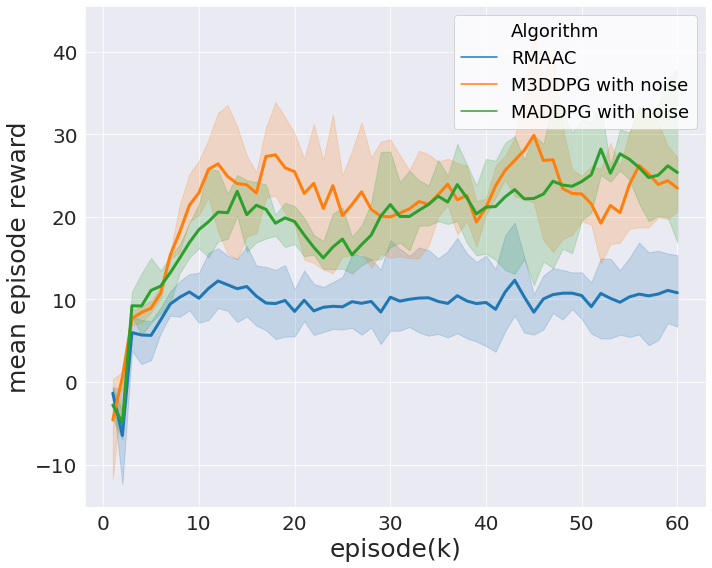

In [11]:
plt_cooperative_scenario('s7')

./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s8_e03_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s8_e01_rewards.pkl
./Neurips2022_Sanbao_Code/MyAlgorithm/v3-rmaddpg-master/experiments/learning_curves/ma_s8_e02_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s8_e03_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s8_e01_rewards.pkl
./Baseline_Project_M3DDPG/experiments/learning_curves/m3nt_s8_e02_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s8_e01_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s8_e03_rewards.pkl
./Baseline_Project_MADDPG/experiments/learning_curves/mdnt_s8_e02_rewards.pkl


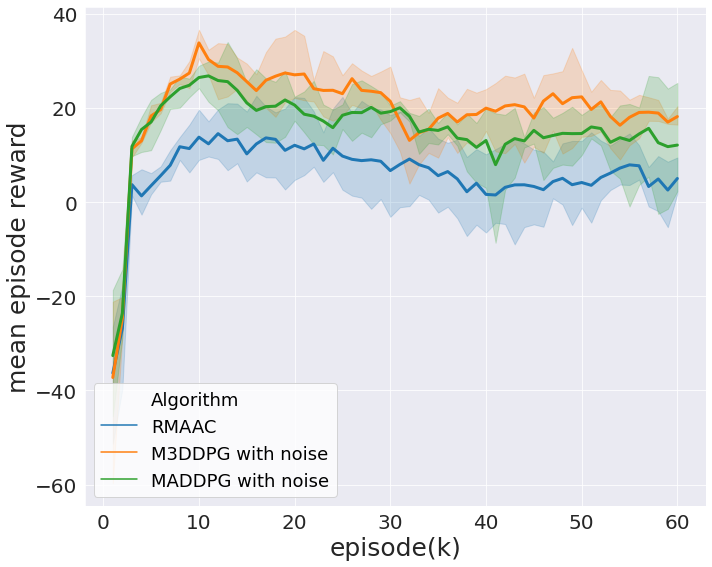

In [12]:
plt_cooperative_scenario('s8')